
# ### Topics to Discuss:
# >What is linear regression?<br>
# >Analyzing Advertisement dataset.<br>
# >Building a simple linear regression model & multiple linear regression model.<br>
# >Understanding OLS methods to estimate model parameters.<br>
# >How to use statsmodel API in python?<br>
# >Interpreting the coefficients of the model.<br>
# >How to find if the parameters estimated are significant?<br>
# >Making predictions using the model.<br>
# >Finding model residuals and analyzing it.<br>
# >Evaluating model efficiency using RMSE and R-Square values.<br>
# >Understanding gradient descent approach to find model parameters.<br>
# >Splitting dataseta and cross validating models.<br>


In [1]:
import pandas as pd
import numpy as np



# ### Adverstiment Dataset
# >The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles 
# >like radio, tv and newspaper.
# 
# ### Attribution Descriptions
# >TV - Spend on TV Advertisements <br>
# >Radio - Spend on radio Advertisements <br>
# >Newspaper - Spend on newspaper Advertisements <br>
# >Sales - Sales revenue generated <br>
# Note: The amounts are in diffrent units


In [2]:

# load the data set
advt = pd.read_csv( r"C:\Users\KARM\Desktop\python\Data Set\Advertising.csv" )
advt.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# rename  all columns

In [3]:
advt.columns = ['unnamed', 'TV', 'Radio', 'Newspaper', 'Sales']

In [4]:
advt.head()

,unnamed,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# rename particular column

In [5]:
advt = advt.rename(columns = {'unnamed':'un'})


In [6]:
advt.head()


,un,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
#Remove the first column

advt = advt[["TV", "Radio", "Newspaper", "Sales"]]


# In[ ]:


advt.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:

# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

advt.apply(lambda x: var_summary(x))


,TV,Radio,Newspaper,Sales
N,200.000000,200.000000,200.000000,200.000000
NMISS,0.000000,0.000000,0.000000,0.000000
SUM,29408.500000,4652.800000,6075.728000,2807.082000
MEAN,147.042500,23.264000,30.378640,14.035410
MEDIAN,149.750000,22.900000,25.750000,12.900000
STD,85.854236,14.846809,21.192412,5.142908
VAR,7370.949893,220.427743,449.118306,26.449501
MIN,0.700000,0.000000,0.999000,4.784000
P1,5.387000,0.399000,0.999990,4.799840
P5,13.195000,1.995000,3.600000,6.600000


In [13]:

# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

advt.apply(lambda x: var_summary(x)).T


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
TV,200.0,0.0,29408.500,147.04250,149.75,85.854236,7370.949893,0.700,5.38700,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.90700,296.400
Radio,200.0,0.0,4652.800,23.26400,22.90,14.846809,220.427743,0.000,0.39900,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.40000,49.600
Newspaper,200.0,0.0,6075.728,30.37864,25.75,21.192412,449.118306,0.999,0.99999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.40115,89.515
Sales,200.0,0.0,2807.082,14.03541,12.90,5.142908,26.449501,4.784,4.79984,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.50007,25.507


In [14]:

#Handling Outliers
advt['Sales']= advt['Sales'].clip_upper(advt['Sales'].quantile(0.99)) 
advt['Sales']= advt['Sales'].clip_lower(advt['Sales'].quantile(0.01)) 

advt['Newspaper']= advt['Newspaper'].clip_upper(advt['Newspaper'].quantile(0.99)) 
advt['Newspaper']= advt['Newspaper'].clip_lower(advt['Newspaper'].quantile(0.01))



In [15]:
#Handling Missings
# Fill with mean
advt['Sales']=advt['Sales'].fillna(advt['Sales'].mean())



# Dummy variable creation


In [17]:
# print df_G.join(pd.get_dummies(advt['key'], prefix='dummy')).drop('key', axis=1).drop('dummy_c', axis=1)


In [18]:

# exploring data
# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


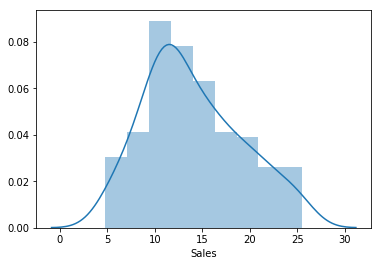

In [19]:

sns.distplot(advt.Sales)



D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


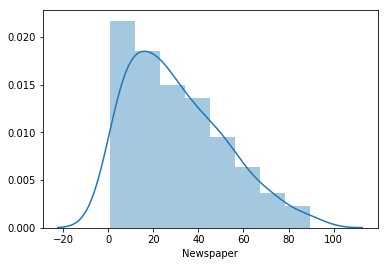

In [20]:

sns.distplot(advt.Newspaper)


D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


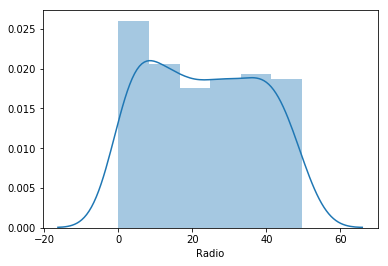

In [21]:

sns.distplot( advt.Radio )



D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


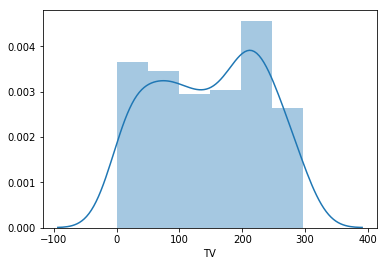

In [22]:

sns.distplot( advt.TV )



# ### Notes:
# >Sales seems to be normal distribution. Spending on newspaper advertisement seems to be righ skewed.
# Most of the spends on newspaper is fairly low where are spend on radio and tv seems be uniform distribution. 
# Spends on tv are comparatively higher then spens on radio and newspaper.


# Is there a relationship between sales and spend various advertising channels?

# Sales Vs. Newspaper advertisement spends


D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


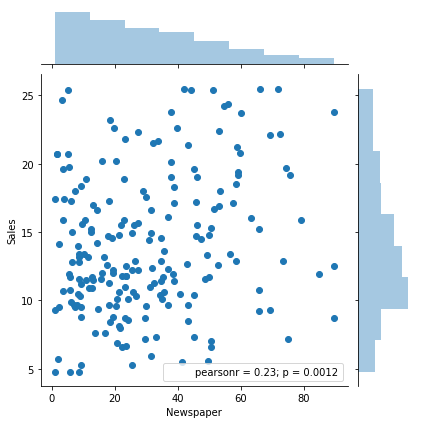

In [23]:


sns.jointplot(  advt.Newspaper, advt.Sales )


# Sales Vs. TV advertisement spends


# The Pearson correlation coefficient measures the linear relationship between two datasets. .

## Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. 
## Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 
## Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. 
## Negative correlations imply that as x increases, y decreases.

# The p-value 
## roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


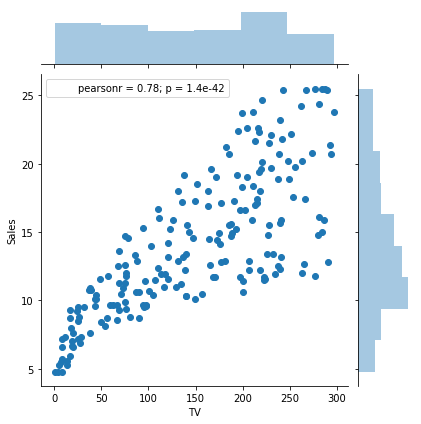

In [24]:
sns.jointplot(  advt.TV, advt.Sales )


# # Notes
# >Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.


In [25]:
get_ipython().run_line_magic('pinfo', 'sns.pairplot')


# Visualizing pairwise correleation


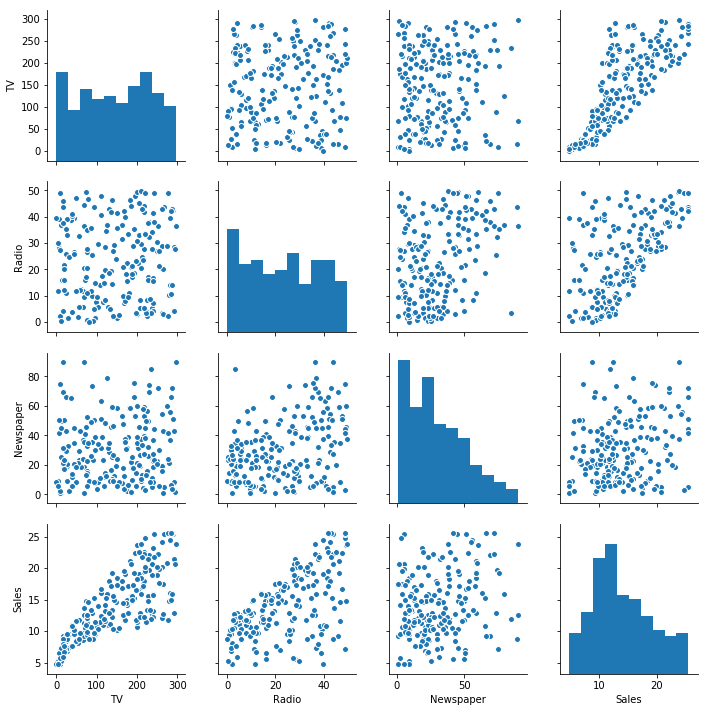

In [55]:
sns.pairplot( advt )


# Calculating correlations


In [26]:
advt.TV.corr( advt.Sales )


0.7823618766334095

In [27]:
advt.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059072,0.782362
Radio,0.054809,1.000000,0.356260,0.583398
Newspaper,0.059072,0.356260,1.000000,0.227554
Sales,0.782362,0.583398,0.227554,1.000000



# Visualizing the correlations
# The darker is the color, the stronger is the correlation

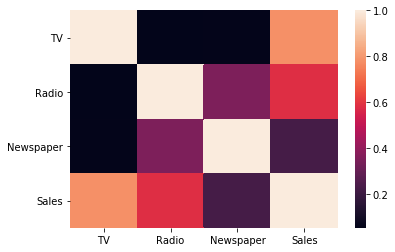

In [28]:
sns.heatmap( advt.corr() )


# ### NOTES:
# > The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then betweeb sales and radio i.e. 0.576. <br>
# > correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing

# ### Building Regression Model
# > Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression <br>
# > A simple linear regression model is given by Y=mX+b <br>
# > where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable. <br>
# > Very briefly and simplistically, Linear Regression is a class of techniques for fitting a straight line to a set of data points


In [29]:
import statsmodels.formula.api as smf


In [30]:
advt.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [31]:
lm = smf.ols( 'Sales ~ TV+Radio', advt ).fit()


In [63]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     939.5
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          1.82e-101
Time:                        02:25:25   Log-Likelihood:                -375.32
No. Observations:                 200   AIC:                             756.6
Df Residuals:                     197   BIC:                             766.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0372      0.279     10.890      0.000       2.487       3.587
TV             0.0451      0.001     34.241      0.000       0.042       0.048
Radio          0.1878      0.008     24.663      0.000       0.173       0.203
==============================================================================
Omnibus:                       29.901   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.439
Skew:                          -0.980   Prob(JB):                     4.50e-09
Kurtosis:                       3.876   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Getting the f value


In [64]:
lm.f_pvalue


1.8192876875949893e-101

# Getting model parameters


In [65]:
lm.params


Intercept    3.037164
TV           0.045086
Radio        0.187786
dtype: float64

# Parameters at 95% confidence intervals


In [66]:
lm.conf_int()


,0,1
Intercept,2.487161,3.587166
TV,0.042489,0.047683
Radio,0.172771,0.202802


# Verifying parameter significance


In [68]:
lm.pvalues


Intercept    6.369904e-22
TV           6.960144e-85
Radio        3.849279e-62
dtype: float64

# ### Notes:
# The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

# Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

# In the output below, we can see that the predictor variables of South and North are significant because both of their p-values are 0.000. However, the p-value for East (0.092) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant
# Typically, you use the coefficient p-values to determine which terms to keep in the regression model. In the model above, we should consider removing East.
# > Parameters estimated are considered to be significant if p-value is less than 0.05 <br>
# > This indicates intercept and TV both are significant parameters. And the parameter estimates can be accepted. <br>
# > So, the linear model is Sales=7.032+0.047∗TV
# 

# ### Evaluating Model Accuracy
# > R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
# > R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
# > R-squared = Explained variation / Total variation <br>
# > Total variation is variation of response variable around it's mean. <br>
# > R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
# > while 100% signifies that the model explains all the variability of the response. <br>
# > The closer the r-square to 100%, the better is the model. <br>


In [69]:

lm.rsquared


0.9051018203011454

In [70]:


round( float( lm.rsquared ), 2 )



0.91

In [71]:

lm.predict



<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x099E6730>>

In [72]:

fit.predict(example_df["c"])


NameError: name 'fit' is not defined

In [73]:

### MAKING PREDICTION`aS
lmpredict = lm.predict( {'TV': advt.TV,'Radio':advt.Radio } )



In [74]:

lmpredict[0:10]

0    20.509818
1    12.423503
2    12.432040
3    17.623297
4    13.216837
5    12.612167
6    11.789012
7    12.137135
8     3.819256
9    12.533627
dtype: float64

In [75]:
from sklearn import metrics



# ### Calculating mean square error ... RMSE
# > RMSE calculate the difference between the actual value and predicted value of the response variable <br>
# > The square root of the mean/average of the square of all of the error. <br> 
# > Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors. <br>
# > The lesser the RMSE value, the better is the model.


In [81]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )
mse

2.4974594216362

In [82]:

rmse = np.sqrt( mse )

In [80]:
rmse


1.5803352244496103

In [83]:

#Get the residuals and plot them
lm.resid[1:10]


1   -2.023503
2   -3.132040
3    0.876703
4   -0.316837
5   -5.412167
6    0.010988
7    1.062865
8    0.980744
9   -1.933627
dtype: float64

# > One of the assumptions is that the residuals should be normally distributed i.e. it should be random.
# The residuals should be plotted against the response variable and it should not show any pattern


D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


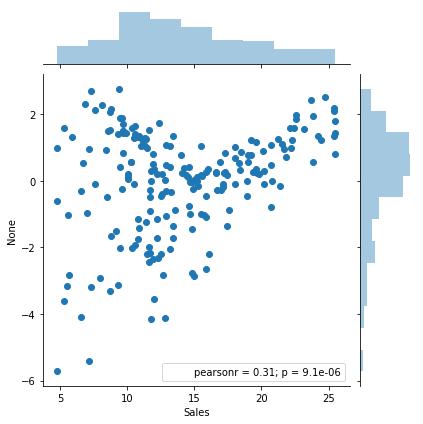

In [84]:

sns.jointplot(  advt.Sales, lm.resid )

# ### Multiple Linear Regression Model


In [86]:
lm = smf.ols( 'Sales ~ TV + Radio + Newspaper', advt ).fit()
lm

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     624.0
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          5.60e-100
Time:                        02:34:10   Log-Likelihood:                -375.19
No. Observations:                 200   AIC:                             758.4
Df Residuals:                     196   BIC:                             771.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0850      0.296     10.416      0.000       2.501       3.669
TV             0.0451      0.001     34.165      0.000       0.043       0.048
Radio          0.1892      0.008     23.192      0.000       0.173       0.205
Newspaper     -0.0028      0.006     -0.487      0.627      -0.014       0.008
==============================================================================
Omnibus:                       29.870   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.405
Skew:                          -0.979   Prob(JB):                     4.58e-09
Kurtosis:                       3.882   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
lm.params

Intercept    3.085033
TV           0.045113
Radio        0.189195
Newspaper   -0.002786
dtype: float64

In [93]:
lm.pvalues

Intercept    1.686808e-20
TV           1.746108e-84
Radio        4.289607e-58
Newspaper    6.265164e-01
dtype: float64

In [95]:

lm = smf.ols( 'Sales ~ TV + Radio', advt ).fit()
lm

In [96]:
lm.params

Intercept    3.037164
TV           0.045086
Radio        0.187786
dtype: float64

In [97]:
lm.pvalues

Intercept    6.369904e-22
TV           6.960144e-85
Radio        3.849279e-62
dtype: float64

In [101]:

lmpredict = lm.predict( {'TV': advt.TV, 'Radio':advt.Radio } )

lmpredict.head()

0    20.509818
1    12.423503
2    12.432040
3    17.623297
4    13.216837
dtype: float64

In [102]:

mse = metrics.mean_squared_error( advt.Sales, lmpredict )
rmse = np.sqrt( mse )
rmse


1.5803352244496103

D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


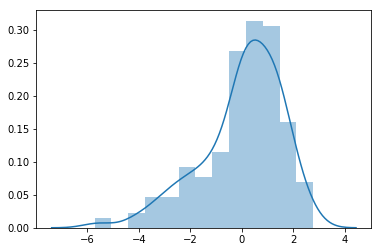

In [103]:
sns.distplot(lm.resid)


D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


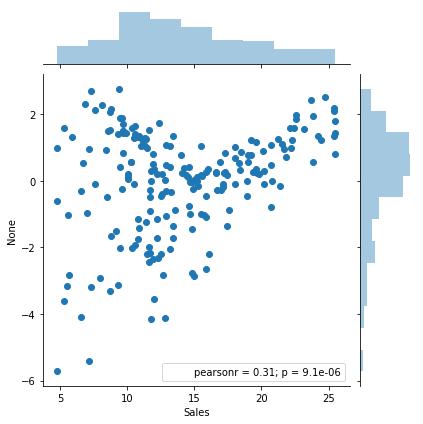

In [104]:

sns.jointplot(  advt.Sales, lm.resid )



# ### USING sklearn Library to build the model
# > sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics


In [105]:

from sklearn.linear_model import LinearRegression



# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.


In [106]:

from sklearn.cross_validation import train_test_split


D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [107]:

X_train, X_test, y_train, y_test = train_test_split(
advt[["TV", "Radio", "Newspaper"]],
advt.Sales,
test_size=0.3,
random_state = 42 )

In [108]:


print (len( X_train ))
print (len( X_test))


140
60


In [109]:

## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )


In [110]:

rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

1.9542412515201586

In [111]:

metrics.r2_score( y_test, y_pred )


0.8601313440383327

In [112]:


list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )



[('TV', 0.043045630029971305),
 ('Radio', 0.20038167342257326),
 ('Newspaper', 0.004126150332766345)]

In [114]:

residuals = y_test - y_pred
residuals

95     0.375900
15     1.267991
30    -0.001530
158   -3.728634
128    2.440728
115   -0.807948
69     1.114307
170    0.902956
174   -1.753112
45    -0.220265
66     0.261182
182    2.071699
165   -2.169810
78    -3.907058
186    0.820163
177   -0.278998
56    -3.560195
152    0.422285
82     0.912402
68     0.180670
124    0.098125
16    -1.066229
148   -1.804631
93     0.843186
65     1.517766
60     2.363582
84     0.809468
67     1.511709
125    1.430636
132   -3.065044
9     -1.553398
18     1.193496
55     2.047386
75    -4.097442
150   -1.865295
104    0.607157
135   -2.876529
137    0.036636
164    0.942746
76     2.365809
79     1.424040
197    0.346553
38    -0.194699
24     1.473526
122   -1.531919
195    2.212890
29     1.142111
19     0.447033
143    1.668898
86     0.194690
114   -1.230797
173    0.031177
5     -6.227036
126   -4.683800
117    2.945527
73     1.214157
140    1.336321
98     1.297863
172   -0.285925
96    -0.475911
Name: Sales, dtype: float64

D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


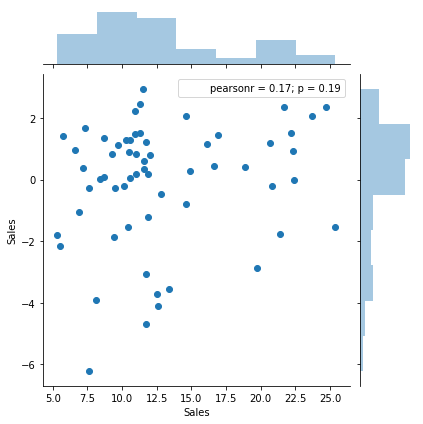

In [115]:

sns.jointplot(  advt.Sales, residuals )

D:\Users\KARM\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


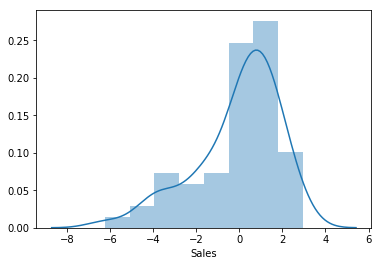

In [116]:

sns.distplot( residuals )


# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.

In [118]:
from scipy import stats
import pylab


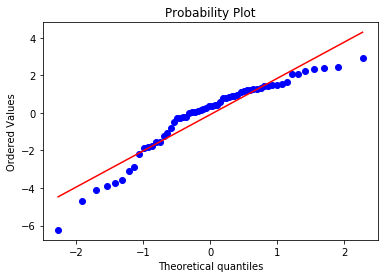

In [119]:

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()



# The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct


## K-FOLD CROSS VALIDATION


In [121]:
from sklearn.cross_validation import cross_val_score


In [123]:

linreg = LinearRegression

In [129]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

TypeError: get_params() missing 1 required positional argument: 'self'

In [132]:
round( np.mean( cross_val_score( linreg,
                              X_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )



TypeError: get_params() missing 1 required positional argument: 'self'

In [133]:

# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [136]:

F_values, p_values  = f_regression(  X_train, y_train )

F_values

array([185.0114304 ,  93.76524204,   8.13474053])

In [137]:
p_values

array([2.92120210e-27, 3.06611013e-17, 5.01074895e-03])

In [138]:

['%.3f' % p for p in p_values]

['0.000', '0.000', '0.005']


## As p - values are less than 5% - the variables are siginificant in the regression equation.


In [139]:

### Exporting and importing the model
import pickle


In [140]:

from sklearn.externals import joblib
joblib.dump(linreg, 'lin_model.pkl', compress=9)


['lin_model.pkl']

In [141]:

model_clone = joblib.load('lin_model.pkl')


In [142]:
model_clone

sklearn.linear_model.base.LinearRegression